-----------

**Q1) 1.	Load the data, reflect the meta data, the versions , acknowledge the source of data**


--------------

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

### ***a.	Import the necessary libraries ***                         

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


### ***b.	Print the versions of the libraries***

In [3]:
# Print the versions of commonly used libraries
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__) # Access version through the matplotlib module
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.8.0
Seaborn version: 0.13.2


### ***c.	Open the data file in Colab (not on local systems)***

### ***d.	Create a dataframe from the given dataset***

In [4]:

car_data = pd.read_excel('MSRP_unstructured.xlsx',sheet_name='MSRP')

### ***e.	Check whether the data is loaded as per expectations in the last few rows ***

In [5]:
car_data.head(14)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
9,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


THe Data has first few columns as entirely null, this needs to be handleted, and also most of the Columns are of the type Object, which needs to be converted to work further

### ***f.	Reflect the meta information about the data file. Explain in one line what each attribute stands for, data type, range of values it can hold. ***

In [6]:
car_data.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,11915,11915,11915,11912,11846,11885,11915,11915,11909,8173,11915,11915,11915,11915,11915,11915
unique,49,916,29,11,357,10,6,5,4,72,4,17,60,70,49,6050
top,Chevrolet,Silverado 1500,2015,regular unleaded,200,4,AUTOMATIC,front wheel drive,4,Crossover,Compact,Sedan,24,17,1385,2000
freq,1123,156,2170,7172,456,4752,8266,4787,8353,1110,4764,3048,876,1230,1123,1036


Data is not clean, so we clean the data, remove the starting 7 rows, and convert datatype from object to int, wherever it is necessary

Removing the First 7 columns of data, to correct the data set and clean it further,

Assigning the column names correctly

Changing the Row number that were initially starting from 8, back to 1, Since top 7 rows were removed from the Data set

In [7]:
new_header = car_data.iloc[7]
car_data = car_data[8:]
car_data.columns = new_header
car_data.head(14)

7,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
8,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
9,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
10,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
11,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
12,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
13,BMW,1 Series,2012,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
14,BMW,1 Series,2012,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
15,BMW,1 Series,2012,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
16,BMW,1 Series,2012,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,36900
17,BMW,1 Series,2013,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,27,18,3916,37200


In [8]:

car_data.index = np.arange(1, len(car_data) + 1)
car_data.head(5)

7,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
3,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
5,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
car_data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object', name=7)

Converting the object data type to int for wherever it is necessary

Data types converted to Int: ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']

In [10]:


# Convert specified columns to integers, handling errors
for col in ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']:
    car_data[col] = pd.to_numeric(car_data[col], errors='coerce').astype('Int64') # Use 'Int64' to allow for NaN

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11914 entries, 1 to 11914
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  object
 3   Engine Fuel Type   11911 non-null  object
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(7), object(9)
memory usage: 1.9+ MB


In [11]:
car_data.describe()

7,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11845.0,11884.0,11908.0,11914.0,11914.0,11914.0,11914.0
mean,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,40594.737032
std,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,60109.103604
min,55.0,0.0,2.0,12.0,7.0,2.0,2000.0
25%,170.0,4.0,2.0,22.0,16.0,549.0,21000.0
50%,227.0,6.0,4.0,26.0,18.0,1385.0,29995.0
75%,300.0,6.0,4.0,30.0,22.0,2009.0,42231.25
max,1001.0,16.0,4.0,354.0,137.0,5657.0,2065902.0


Engine HP: Horsepower of the engine; ranges from 55 to 1001, with an average around 249.39.

Engine Cylinders: Number of cylinders in the engine; ranges from 0 (for electric vehicles, perhaps) to 16, with a typical value of 4 to 6.

Number of Doors: Number of doors on the vehicle; ranges from 2 to 4, with 4 being the most common.

highway MPG: Miles per gallon achieved on highways;  ranges from 12 to 354, with an average around 26.64.

city mpg: Miles per gallon achieved in city driving;  ranges from 7 to 137, with an average around 19.73.

Popularity: Popularity score based on demand or sales volume;  ranges from 2 to 5657, with an average around 1554.91.

MSRP: Manufacturer’s Suggested Retail Price (base price of the vehicle);  ranges from $2000 to $2,065,902, with an average price of around $40,594.74.




In [12]:
data_source = "Data source and method : Scraped from Edmunds and Twitter  "
print(f"Data Source: {data_source}")
print(f"Acknowledgements : Edmunds and Twitter for providing info")

Data Source: Data source and method : Scraped from Edmunds and Twitter  
Acknowledgements : Edmunds and Twitter for providing info


--------------

# ***2.	Sanity check the data    ***                                                                                                       

-----------------

In [13]:
car_data.size

190624

In [14]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11914 entries, 1 to 11914
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  object
 3   Engine Fuel Type   11911 non-null  object
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(7), object(9)
memory usage: 1.9+ MB


### ***a.	Depth Vs breadth analysis, comment whether the number of instances is sufficient for the task at hand given the number of variables***

In [15]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11914 entries, 1 to 11914
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  object
 3   Engine Fuel Type   11911 non-null  object
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(7), object(9)
memory usage: 1.9+ MB


Data Size after removing the first 7 rows of NAN Values is : Depth = 11914
Breadth = 16

Depth = 11,914
Breadth = 16
Depth-to-Breadth Ratio = 11,914 / 16 = 745.88
With a ratio of approximately 746 instances per variable, this is more than sufficient for most tasks, indicating a high-depth dataset relative to its breadth. This dataset size is likely adequate for complex machine learning models and will provide robust insights in statistical analysis.

### ***b.	What is the total memory space the data occupies?***

In [16]:
memory_usage_bytes = car_data.memory_usage(deep=True).sum()
memory_usage_mb = memory_usage_bytes / (1024 ** 2)  # Convert bytes to MB

print(f"Total memory usage: {memory_usage_mb:.2f} MB")

Total memory usage: 7.51 MB


In [17]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11914 entries, 1 to 11914
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  object
 3   Engine Fuel Type   11911 non-null  object
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(7), object(9)
memory usage: 1.9+ MB


### ***c)	Check the data types and size. Share your findings for each attribute. Do you think the datatype is correct and has optimal size?***

The Data types for certain columns are not correct, it is wrongly assigned, so we change the data type from Object to Int.

These steps have already been performed while preparing data for answering the question number 1

In [18]:
# Convert specified columns to integers, handling errors
#for col in ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']:
    #car_data[col] = pd.to_numeric(car_data[col], errors='coerce').astype('Int64') # Use 'Int64' to allow for NaN

#car_data.info()


### ***d)	If you have modified the data size, type what is the result on the size of data after the modification? How much space is saved or consumed more?***

In [19]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11914 entries, 1 to 11914
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               11914 non-null  object
 1   Model              11914 non-null  object
 2   Year               11914 non-null  object
 3   Engine Fuel Type   11911 non-null  object
 4   Engine HP          11845 non-null  Int64 
 5   Engine Cylinders   11884 non-null  Int64 
 6   Transmission Type  11914 non-null  object
 7   Driven_Wheels      11914 non-null  object
 8   Number of Doors    11908 non-null  Int64 
 9   Market Category    8172 non-null   object
 10  Vehicle Size       11914 non-null  object
 11  Vehicle Style      11914 non-null  object
 12  highway MPG        11914 non-null  Int64 
 13  city mpg           11914 non-null  Int64 
 14  Popularity         11914 non-null  Int64 
 15  MSRP               11914 non-null  Int64 
dtypes: Int64(7), object(9)
memory usage: 1.9+ MB


We can see the Memory before conversion was around : 7.5 mb, after the data types were converted from Object to INt, the Memory usage has been reduced to around 1.9 MB, which is a significant change where there are millions of data points, this will come handy


### ***e.	Identify the potential problem in columns with incorrect data type, explain what the problem is and how did you address the problem (do not drop the row.)***

The columns with incorrect data types are :                     
 ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']  

These data types has to be converted to INT as it allows us to perform essential calculations directly, such as finding averages, sums, or applying functions like standard deviation, which are crucial for analysis.

The conversion has been done already, pasting the code below as well for reference

In [20]:
# Convert specified columns to integers, handling errors
#for col in ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']:
    #car_data[col] = pd.to_numeric(car_data[col], errors='coerce').astype('Int64') # Use 'Int64' to allow for NaN

#car_data.info()

--------------------

# ***3.	Challenges in the data     ***                                                                                                                  

----------

### ***a.	Does any column have missing values? List the columns that have. Could this be the case of MCAR, MAR or MNAR? ***

In [21]:
car_data.isnull().sum()

,0
7,
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6


 Based on this structure, most missing values appear to fit MAR, with a possibility of MNAR for "Market Category."

### ***b.	Identify the instances with missing values (give your findings if any from the identified instances with missing values in the column***

In [22]:
car_data.isnull().sum()

,0
7,
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6


Engine Fuel Type: 3 missing values.
Engine HP: 69 missing values.
Engine Cylinders: 30 missing values.
Number of Doors: 6 missing values.
Market Category: 3,742 missing values.

### ***c.	What strategy would you like to use to address the missing values. Do not drop the records. Support your choice of strategy with a reason (why did you choose that particular strategy over others)***

We can group by columns that capture similar characteristics of vehicles. Here’s an approach that leverages grouping by columns like Make, Model, and possibly Vehicle Size to impute missing values with the most common category in each group

In [23]:
car_data_bkp = car_data.copy()

In [24]:
car_data.isnull().sum()

,0
7,
Make,0
Model,0
Year,0
Engine Fuel Type,3
Engine HP,69
Engine Cylinders,30
Transmission Type,0
Driven_Wheels,0
Number of Doors,6


Grouping Car Make and Model, to impute the missing values of Market Category column

In [25]:
car_data['Make'] = car_data['Make'].astype(str)
car_data['Model'] = car_data['Model'].astype(str)
car_data['Market Category'] = car_data['Market Category'].astype(str)

# Step 1: Mark rows where 'Market Category' was originally missing
car_data['Market Category Imputed'] = car_data['Market Category'].isnull()

# Step 2: Impute missing values for 'Market Category'
car_data['Market Category'] = car_data.groupby(['Make', 'Model'])['Market Category'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Other")
)

### ***d.	Support your approach with a hypothesis test. ***

Hypothesis Setup
Null Hypothesis (
𝐻
0
H
0
​
 ): The distribution of Market Category after imputation is not significantly different from the original distribution.
Alternative Hypothesis (
𝐻
1
H
1
​
 ): The distribution of Market Category after imputation is significantly different from the original distribution.

In [26]:
# Step 3: Separate observed and imputed data
observed_data = car_data[car_data['Market Category Imputed'] == False]
imputed_data = car_data[car_data['Market Category Imputed'] == True]

# Step 4: Create a contingency table for observed and imputed counts
observed_counts = observed_data['Market Category'].value_counts()
imputed_counts = imputed_data['Market Category'].value_counts()
contingency_table = pd.DataFrame({'Observed': observed_counts, 'Imputed': imputed_counts}).fillna(0)


In [27]:
# Step 4: Create a contingency table for observed and imputed counts
observed_counts = observed_data['Market Category'].value_counts()
imputed_counts = imputed_data['Market Category'].value_counts()
contingency_table = pd.DataFrame({'Observed': observed_counts, 'Imputed': imputed_counts}).fillna(0)

In [28]:
# prompt: create a hypothesis test for this

# Assuming 'car_data' DataFrame and 'Market Category' column are already processed as in the provided code.

import scipy.stats as stats
import numpy as np

# Contingency table (replace with your actual contingency table)
# Example:
# contingency_table = pd.DataFrame({
#     'Observed': {'Category A': 100, 'Category B': 50, 'Category C': 25},
#     'Imputed': {'Category A': 60, 'Category B': 30, 'Category C': 10}
# })

# Perform Chi-Square Test
# Adding a small value (0.5) to all cells to avoid zero expected frequencies.
# This is called "continuity correction" and helps when sample sizes are small.
contingency_table = contingency_table.applymap(lambda x: x + 0.5)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("The observed and imputed distributions are significantly different (reject null hypothesis).")
else:
    print("There's no significant difference between the observed and imputed distributions (fail to reject null hypothesis).")

Chi-square statistic: 568.8867241687342
P-value: 8.829611470154686e-79
Degrees of freedom: 71
Expected frequencies:
 [[1.10766311e+03 3.33689304e+00]
 [7.97597197e+00 2.40280327e-02]
 [1.99399299e+00 6.00700818e-03]
 [1.99399299e+00 6.00700818e-03]
 [2.69189054e+01 8.10946104e-02]
 [5.98197898e+00 1.80210245e-02]
 [4.98498248e+00 1.50175204e-02]
 [6.48047722e+01 1.95227766e-01]
 [1.09669615e+01 3.30385450e-02]
 [6.97897547e+00 2.10245286e-02]
 [6.97897547e+00 2.10245286e-02]
 [7.27807442e+01 2.19255798e-01]
 [6.97897547e+00 2.10245286e-02]
 [7.97597197e+00 2.40280327e-02]
 [6.97897547e+00 2.10245286e-02]
 [4.28708493e+01 1.29150676e-01]
 [4.09765560e+02 1.23444018e+00]
 [3.48948774e+01 1.05122643e-01]
 [9.96996496e+00 3.00350409e-02]
 [2.49249124e+01 7.50876022e-02]
 [1.13657601e+02 3.42399466e-01]
 [2.99098949e+00 9.01051226e-03]
 [6.97897547e+01 2.10245286e-01]
 [8.47447022e+01 2.55297847e-01]
 [5.18438178e+01 1.56182213e-01]
 [2.19339229e+01 6.60770899e-02]
 [5.28408143e+01 1.591857

<ipython-input-28-080e026469be>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contingency_table = contingency_table.applymap(lambda x: x + 0.5)


### ***e.	Do suitable plotting for all the attributes and comment on the plots reflecting the information that the plot visually communicates about the attribute***

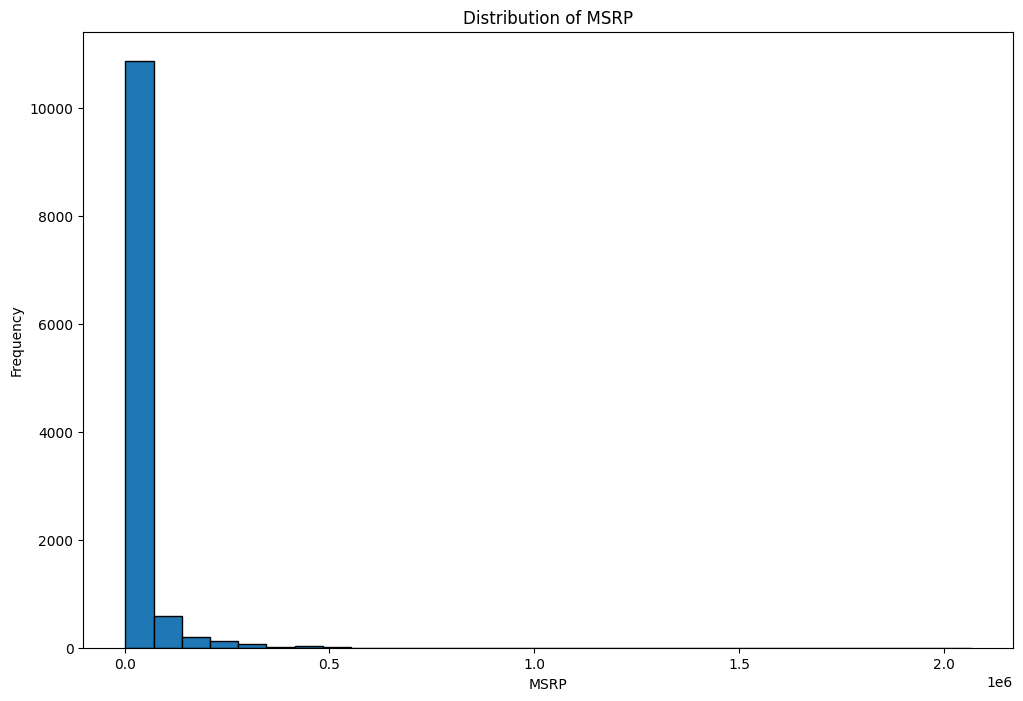

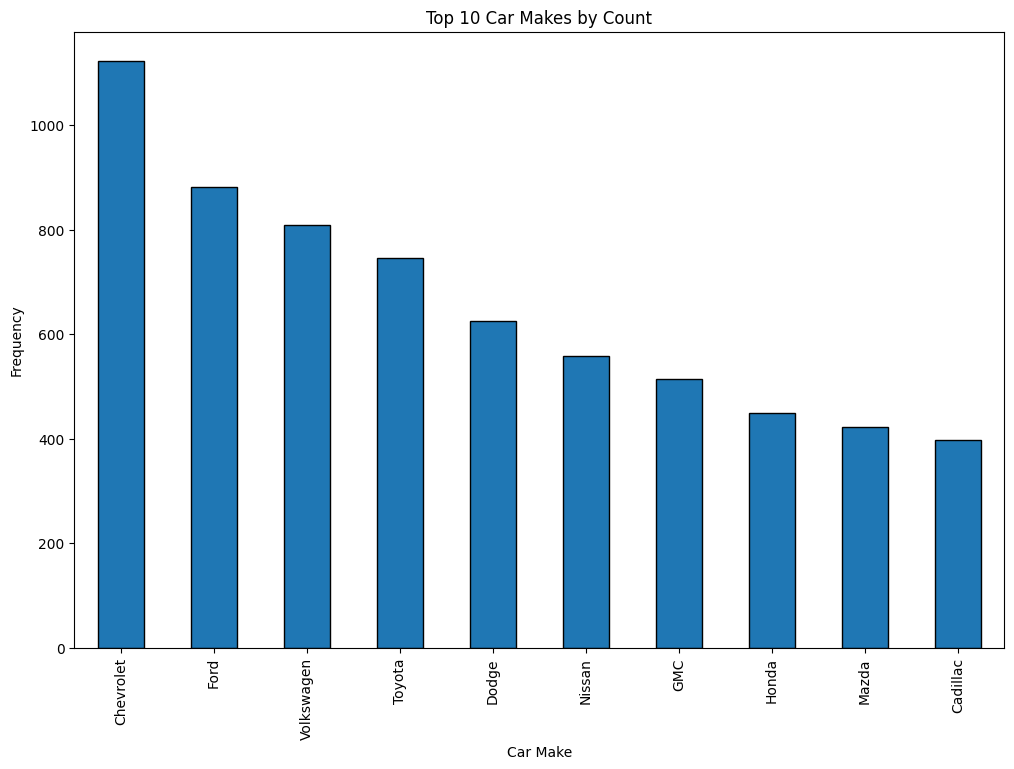

<Figure size 1200x800 with 0 Axes>

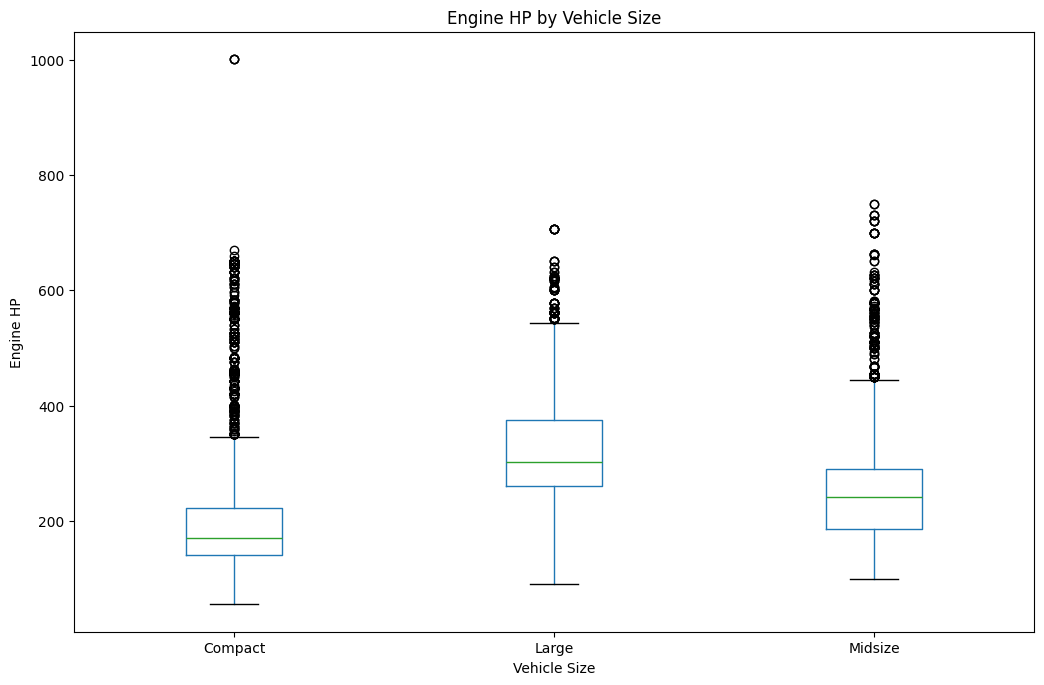

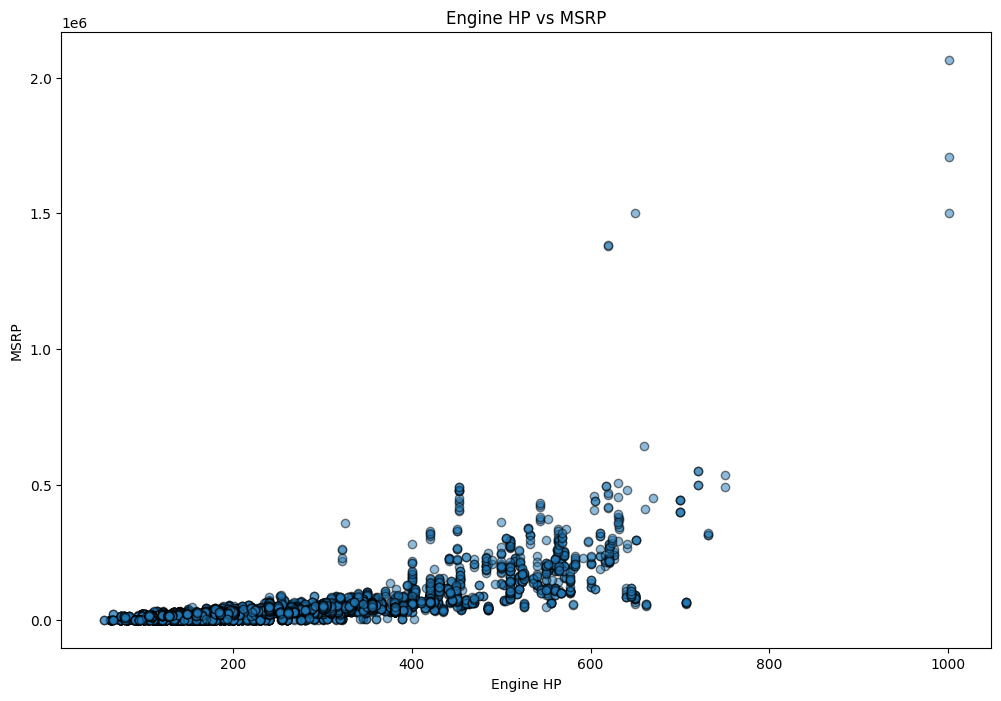

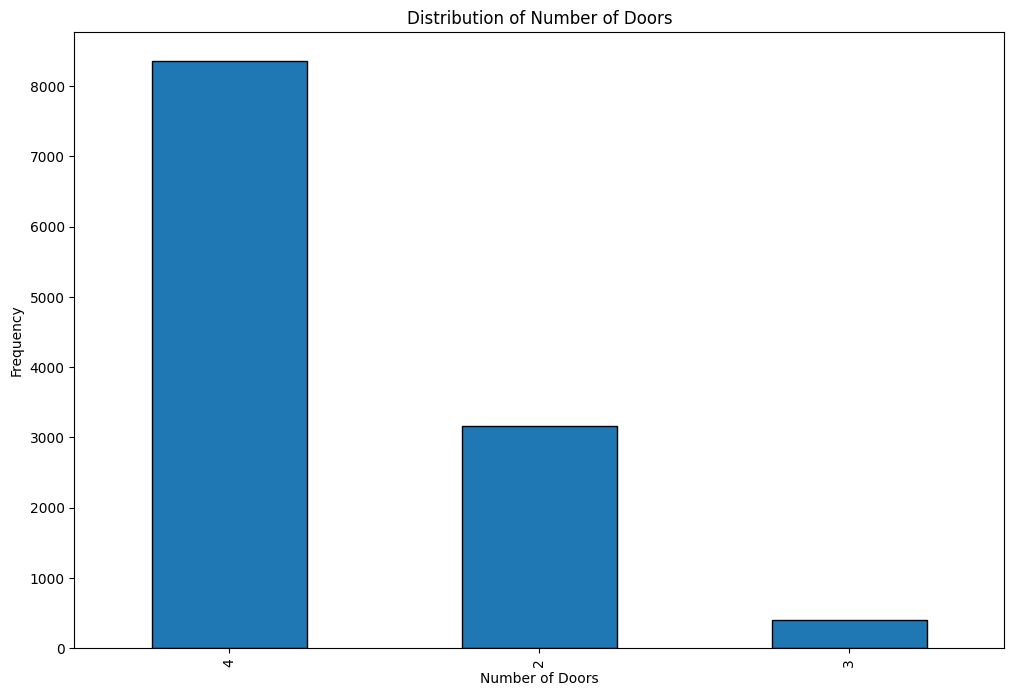

In [29]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Plot 1: Distribution of 'MSRP'
plt.figure()
car_data['MSRP'].hist(bins=30, edgecolor='black')
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Plot 2: Count plot for 'Make' to visualize frequency of each car make
plt.figure()
car_data['Make'].value_counts().head(10).plot(kind='bar', edgecolor='black')
plt.title('Top 10 Car Makes by Count')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Box plot of 'Engine HP' by 'Vehicle Size' to show performance by vehicle size
plt.figure()
car_data.boxplot(column='Engine HP', by='Vehicle Size', grid=False)
plt.title('Engine HP by Vehicle Size')
plt.suptitle("")  # Remove the default boxplot title
plt.xlabel('Vehicle Size')
plt.ylabel('Engine HP')
plt.show()

# Plot 4: Scatter plot of 'Engine HP' vs 'MSRP' to show correlation between horsepower and price
plt.figure()
plt.scatter(car_data['Engine HP'], car_data['MSRP'], alpha=0.5, edgecolor='k')
plt.title('Engine HP vs MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Plot 5: Distribution of 'Number of Doors'
plt.figure()
car_data['Number of Doors'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Frequency')
plt.show()

Distribution of MSRP:

The histogram shows that most vehicles have a lower MSRP, with fewer high-priced cars. This suggests that the dataset contains a large proportion of more affordable models, with a few luxury or high-end vehicles.
Top 10 Car Makes by Count:

This bar plot reveals the most common car makes in the dataset, with brands like BMW and Chevrolet being highly represented. This could indicate a dataset focus on popular or commonly sold car brands.
Engine HP by Vehicle Size:

The box plot shows the distribution of horsepower across different vehicle sizes. Larger vehicles, such as full-size cars, tend to have higher horsepower, which aligns with their need for stronger engines.
Engine HP vs MSRP:

The scatter plot illustrates a positive correlation between horsepower and MSRP; cars with higher horsepower are generally more expensive, reflecting the premium pricing of high-performance vehicles.
Distribution of Number of Doors:

This bar plot shows the prevalence of 4-door and 2-door configurations, with 4-door vehicles being the most common. This reflects a typical market trend, as many family and passenger cars have four doors.

### ***f.	Do you find any variables with outliers? Identify the records / instances which contain the outliers in those variables. Give you comments on the outliers. ***

In [30]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers in 'MSRP' and 'Engine HP'
msrp_outliers = find_outliers(car_data, 'MSRP')
engine_hp_outliers = find_outliers(car_data, 'Engine HP')

# Display the outlier instances for MSRP and Engine HP
msrp_outliers_info = msrp_outliers[['Make', 'Model', 'MSRP']]
engine_hp_outliers_info = engine_hp_outliers[['Make', 'Model', 'Engine HP']]

# Display the outliers data
print("MSRP Outliers:")
print(msrp_outliers_info)

print("\nEngine HP Outliers:")
print(engine_hp_outliers_info)

# Count the number of outliers in each variable
print(f"\nNumber of MSRP outliers: {len(msrp_outliers)}")
print(f"Number of Engine HP outliers: {len(engine_hp_outliers)}")

MSRP Outliers:
7          Make Model    MSRP
295     Ferrari   360  160829
296     Ferrari   360  140615
297     Ferrari   360  150694
298     Ferrari   360  170829
299     Ferrari   360  165986
...         ...   ...     ...
11737  Cadillac   XLR   85650
11738  Cadillac   XLR   86215
11904       BMW    Z8  128000
11905       BMW    Z8  130000
11906       BMW    Z8  131500

[996 rows x 3 columns]

Engine HP Outliers:
7         Make       Model  Engine HP
467    Ferrari  458 Italia        562
468    Ferrari  458 Italia        562
469    Ferrari  458 Italia        562
470    Ferrari  458 Italia        597
471    Ferrari  458 Italia        562
...        ...         ...        ...
11510      BMW        X5 M        567
11511      BMW        X5 M        567
11524      BMW        X6 M        567
11525      BMW        X6 M        567
11526      BMW        X6 M        567

[509 rows x 3 columns]

Number of MSRP outliers: 996
Number of Engine HP outliers: 509


Boxplot for the same

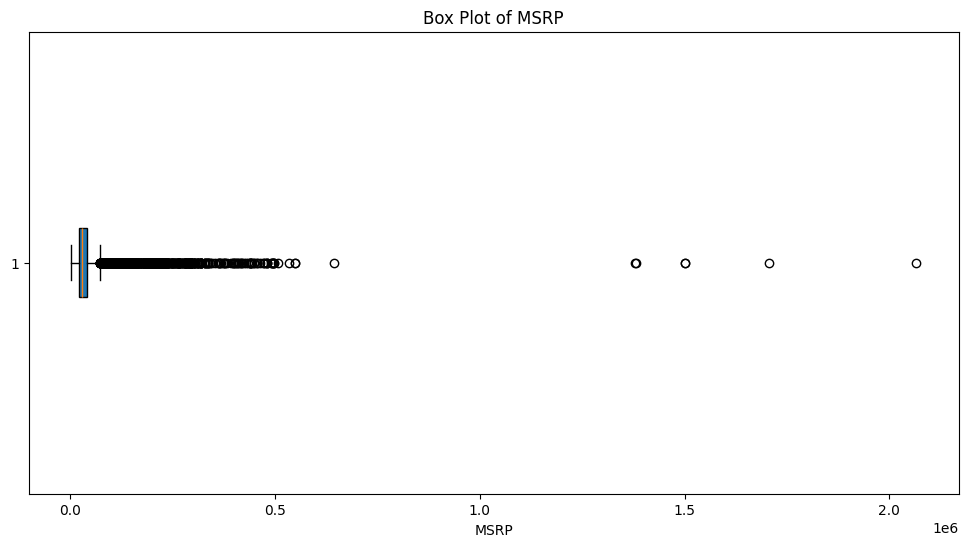

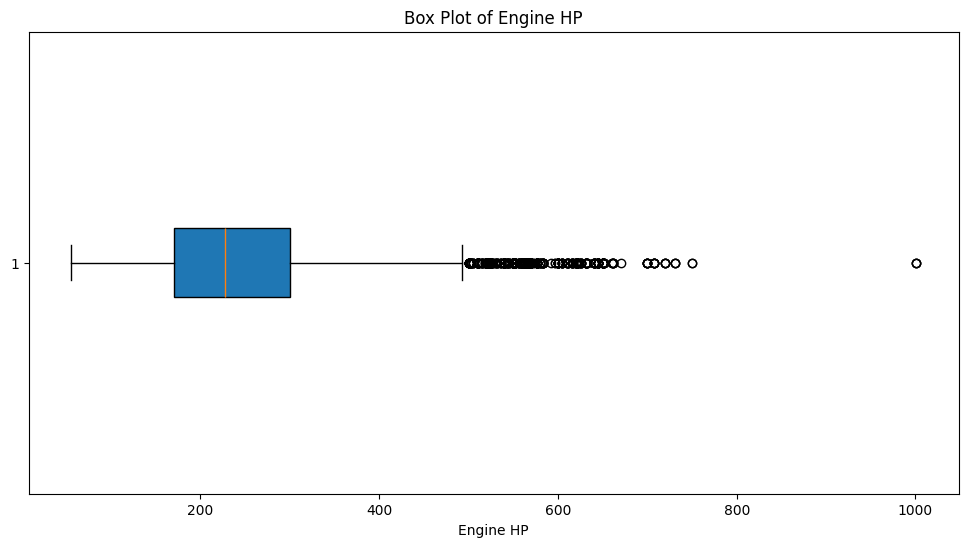

In [31]:
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

# Box Plot for MSRP to visually identify outliers
plt.figure()
plt.boxplot(car_data['MSRP'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of MSRP')
plt.xlabel('MSRP')
plt.show()

# Box Plot for Engine HP to visually identify outliers
plt.figure()
plt.boxplot(car_data['Engine HP'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Engine HP')
plt.xlabel('Engine HP')
plt.show()

### ***g.	What strategy would you like to use to address the outliers if you decided to remove them.***

IQR Method for Outlier Removal

 Interquartile Range (IQR) method, setting bounds based on 1.5 times the IQR below the first quartile and above the third quartile. Outliers outside these bounds are removed.
Use Case: Effective for continuous variables with skewed distributions, like MSRP and Engine HP, where extreme values may distort analysis.

In [32]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to remove outliers from 'MSRP' and 'Engine HP'
car_data_cleaned = remove_outliers_iqr(car_data, 'MSRP')
car_data_cleaned = remove_outliers_iqr(car_data_cleaned, 'Engine HP')

### ***h.	Support your approach with hypothesis testing***

In [33]:
from scipy.stats import ks_2samp
ks_stat_msrp, p_value_msrp = ks_2samp(car_data['MSRP'].dropna(), car_data_cleaned['MSRP'].dropna())
print(f"MSRP K-S Test Statistic: {ks_stat_msrp}, p-value: {p_value_msrp}")

# Step 4: Perform K-S test between original and cleaned data for Engine HP
ks_stat_hp, p_value_hp = ks_2samp(car_data['Engine HP'].dropna(), car_data_cleaned['Engine HP'].dropna())
print(f"Engine HP K-S Test Statistic: {ks_stat_hp}, p-value: {p_value_hp}")

# Interpretation
if p_value_msrp < 0.05:
    print("Reject the null hypothesis for MSRP: Removing outliers significantly changes the MSRP distribution.")
else:
    print("Fail to reject the null hypothesis for MSRP: No significant difference in MSRP distribution after outlier removal.")

if p_value_hp < 0.05:
    print("Reject the null hypothesis for Engine HP: Removing outliers significantly changes the Engine HP distribution.")
else:
    print("Fail to reject the null hypothesis for Engine HP: No significant difference in Engine HP distribution after outlier removal.")

MSRP K-S Test Statistic: 0.08388794942412237, p-value: 3.951990710782062e-35
Engine HP K-S Test Statistic: 0.07514422270190735, p-value: 3.4224658443408184e-28
Reject the null hypothesis for MSRP: Removing outliers significantly changes the MSRP distribution.
Reject the null hypothesis for Engine HP: Removing outliers significantly changes the Engine HP distribution.



# ***4.	 Pairplot analysis ***                                                                                                                                    


### ***a.	Do a pairplot analysis on all the columns in the data***

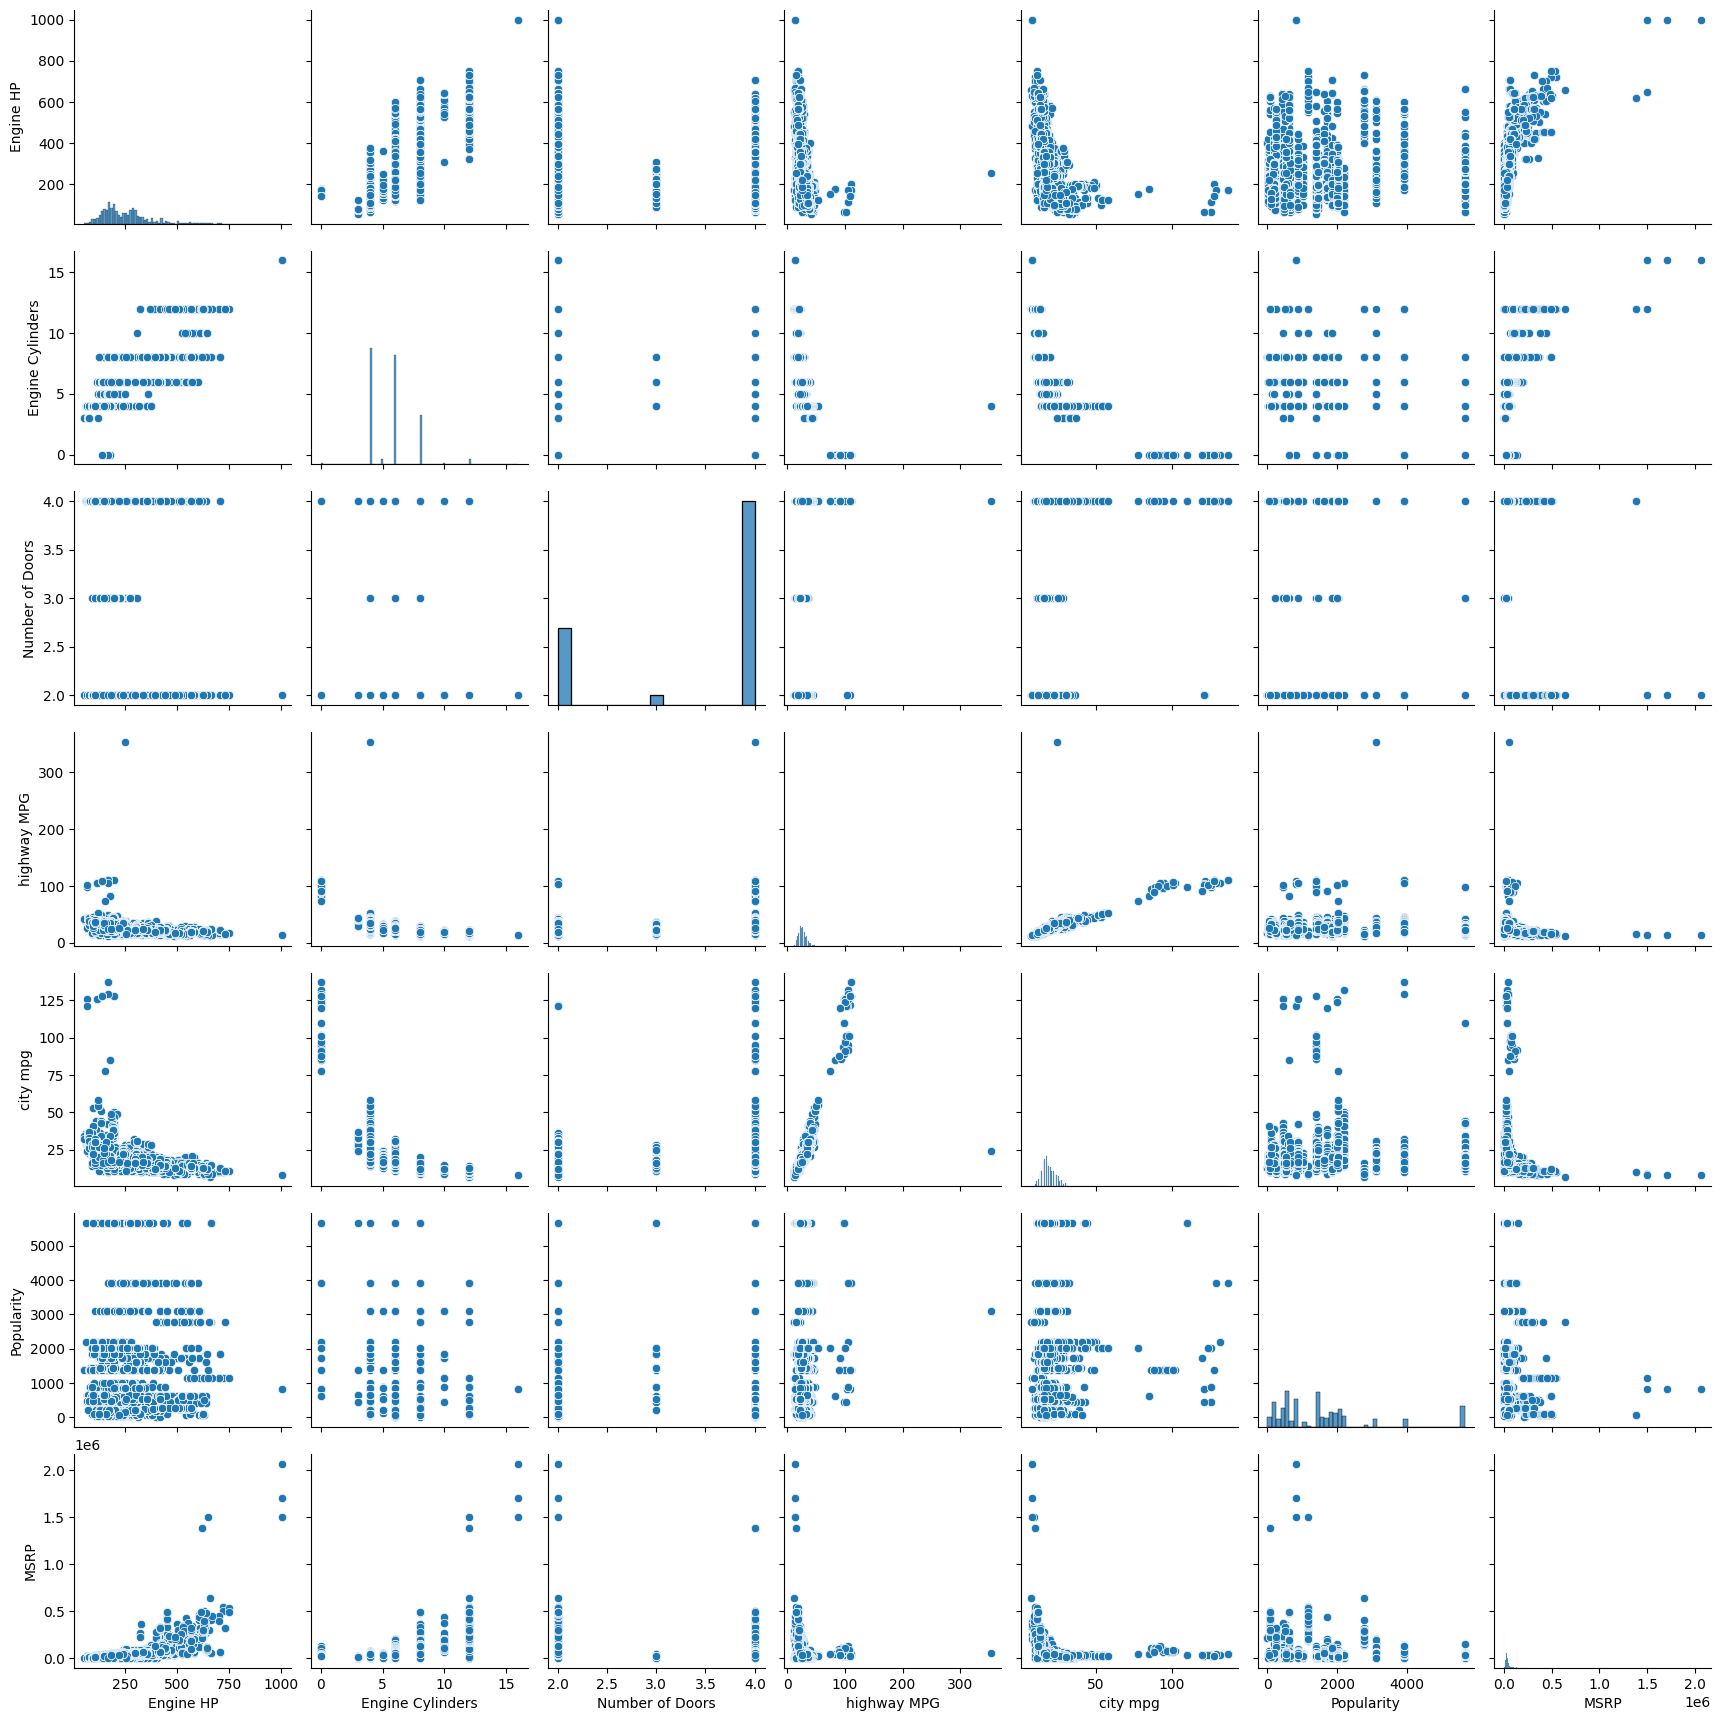

In [35]:
numeric_data = car_data.select_dtypes(include=['float64', 'int64'])

# Creating a pairplot to visualize relationships
sns.pairplot(numeric_data)
plt.show()

Distribution Plots (Diagonal)

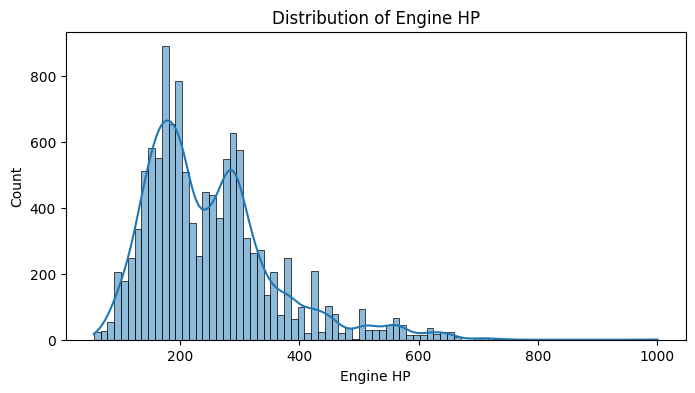

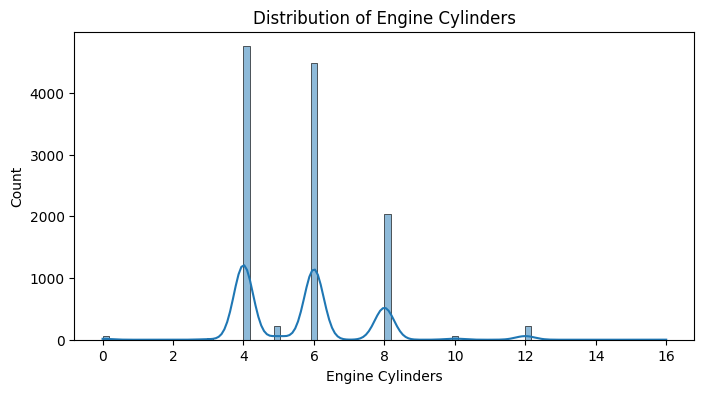

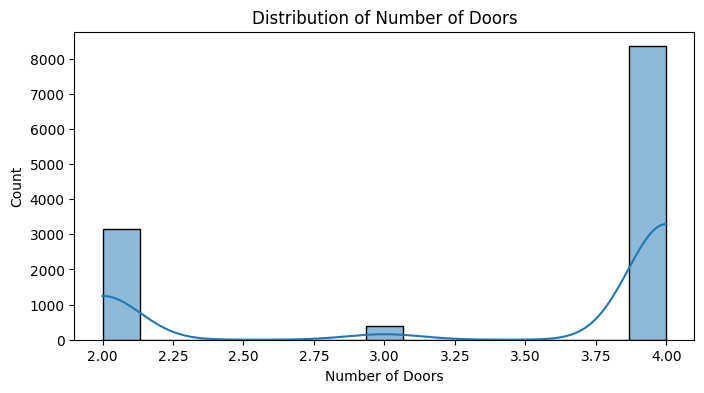

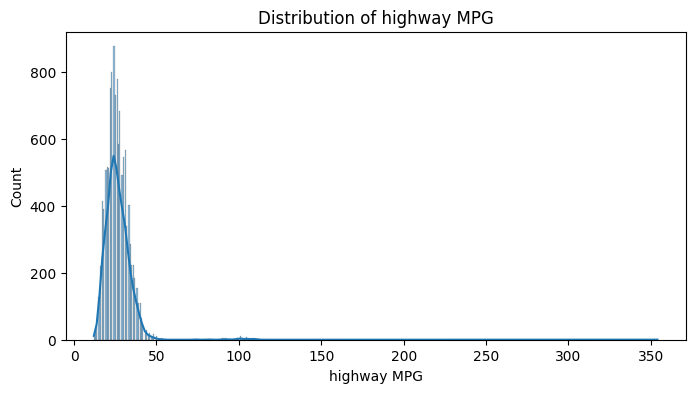

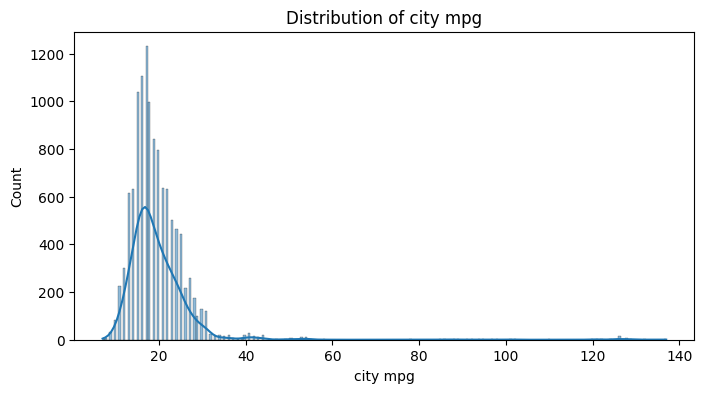

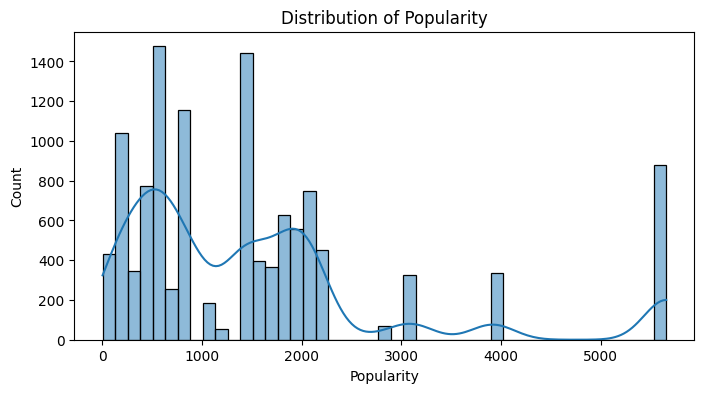

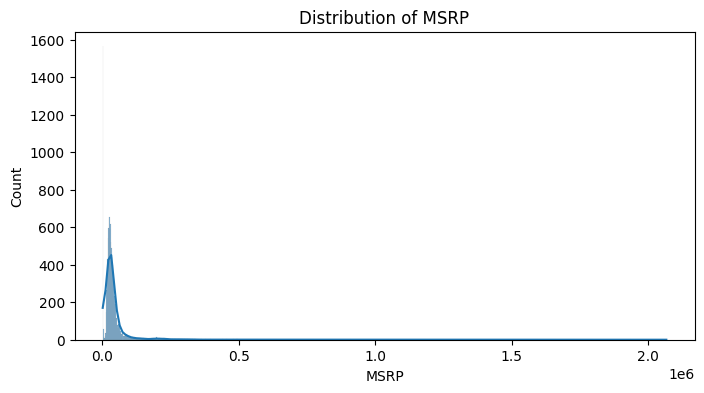

In [36]:
for column in numeric_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Scatter Plots (Off-Diagonal)

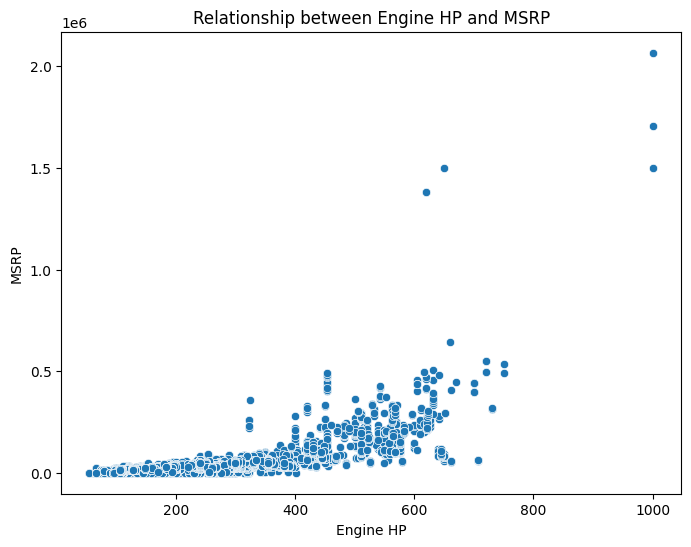

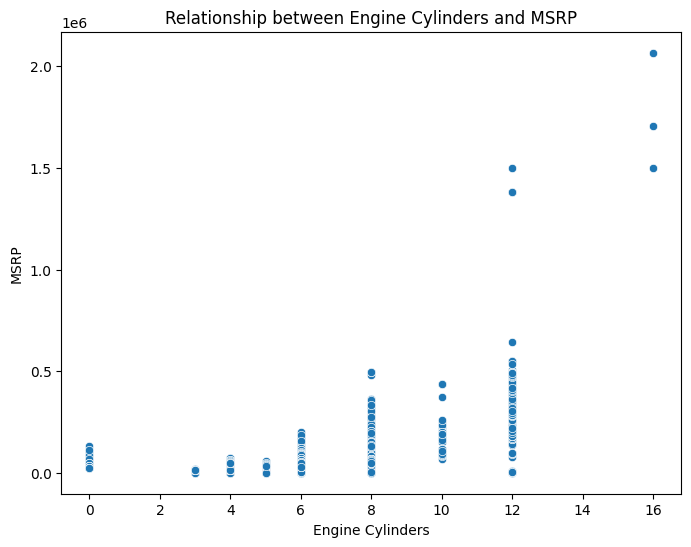

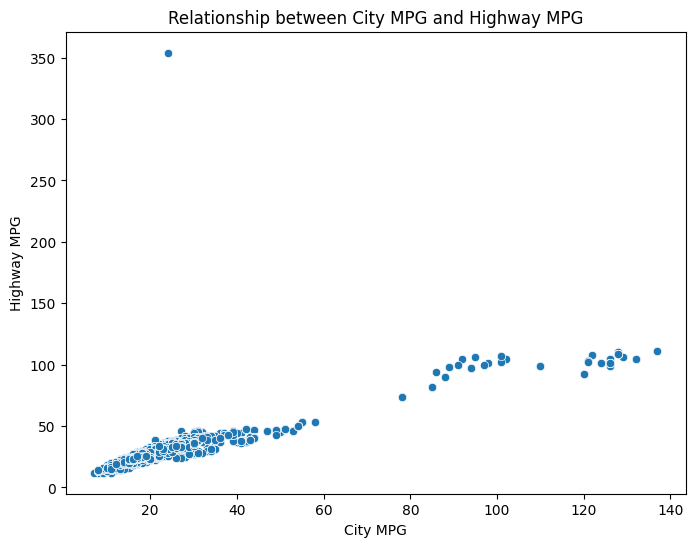

In [39]:
numeric_data = car_data.select_dtypes(include=['float64', 'int64'])
# Scatter plot between MSRP and Engine HP
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine HP', y='MSRP', data=numeric_data)
plt.title('Relationship between Engine HP and MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

# Scatter plot between MSRP and Engine Cylinders
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Cylinders', y='MSRP', data=numeric_data)
plt.title('Relationship between Engine Cylinders and MSRP')
plt.xlabel('Engine Cylinders')
plt.ylabel('MSRP')
plt.show()

# Scatter plot between City MPG and Highway MPG
plt.figure(figsize=(8, 6))
sns.scatterplot(x='city mpg', y='highway MPG', data=numeric_data)
plt.title('Relationship between City MPG and Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()

### ***b.	Comment on what you find in the diagonal and off diagonal.***

The diagonal shows distributions of individual numeric variables:

Engine HP, Engine Cylinders, Highway MPG, and City MPG exhibit a right-skewed distribution, with most values concentrated in lower ranges and fewer in higher ranges.
MSRP has a wide range of values, indicating some high-priced outliers.
Popularity shows a highly skewed distribution, with the majority of cars falling under a few popularity values and a long tail for less common popularity scores.

Off-Diagonal (Scatter plots between pairs of variables)
Target (MSRP) and Predictor Variables:

Engine HP and Engine Cylinders show a positive relationship with MSRP, indicating that vehicles with higher horsepower and more cylinders generally have a higher MSRP.
Highway MPG and City MPG show a weak negative relationship with MSRP, implying that high fuel efficiency might be slightly associated with lower prices.
Relationships between Predictor Variables:

Engine HP and Engine Cylinders show a strong positive correlation, as vehicles with more cylinders generally have higher horsepower.
City MPG and Highway MPG are positively correlated, as vehicles that are more efficient in the city tend to also be efficient on the highway.
Overall, Engine HP and Engine Cylinders are strong predictors for MSRP, while fuel efficiency (City MPG, Highway MPG) and popularity have less impact

### ***c.	Comment on the relationship (if any) between the target and predictor variables***

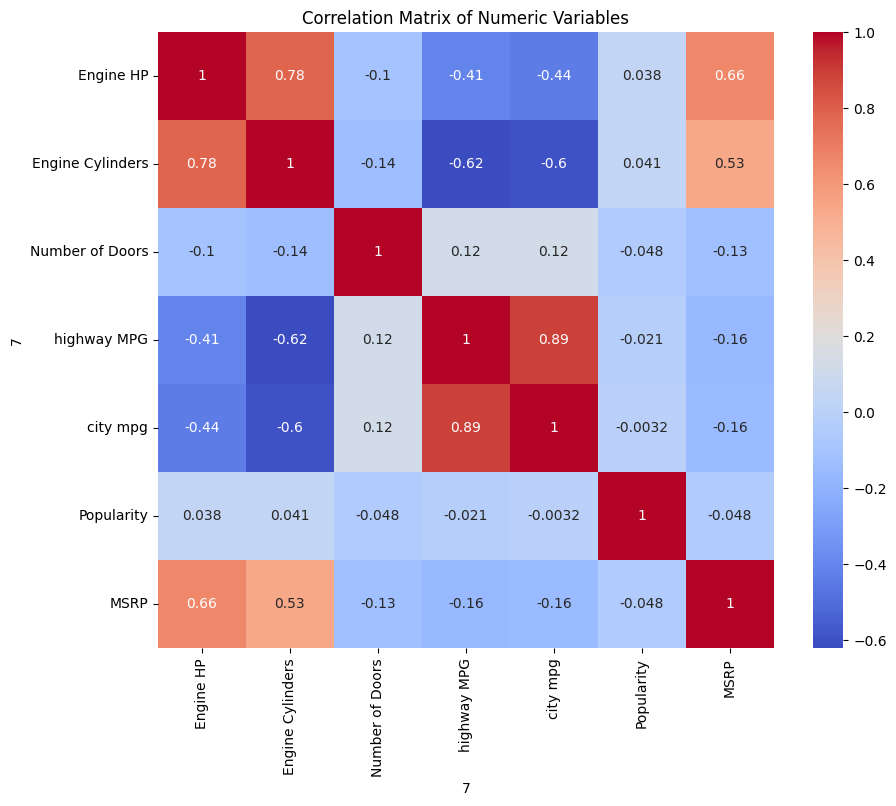

In [41]:
# Heatmap to show correlation among predictor variables
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

***Key Observations with Respect to MSRP***
***Engine HP:***

***High Positive Correlation***: Engine HP has a strong positive correlation with MSRP. This suggests that as the horsepower of the vehicle increases, the price (MSRP) tends to increase as well. Vehicles with higher horsepower are likely to be more powerful and are often positioned at a premium price.

***Engine Cylinders:***

***Positive Correlation:*** Engine Cylinders also shows a positive correlation with MSRP. Vehicles with more cylinders often belong to higher performance categories, which are generally priced higher. This makes Engine Cylinders a relevant predictor for MSRP.

***Popularity:***

***Weak Positive Correlation:*** Popularity has a weak positive correlation with MSRP. While more popular cars may have a slightly higher price, this relationship is not strong enough to indicate a significant trend across the dataset.

***Highway MPG and City MPG:***

***Weak Negative Correlation:*** Both Highway MPG and City MPG have a weak negative correlation with MSRP. This suggests that vehicles with higher fuel efficiency (miles per gallon) tend to have a slightly lower price, likely because fuel-efficient cars are generally lighter and have smaller engines, which may cost less to manufacture.

### ***d.	Comment on the relationship between the predictor variables***

 Correlation Heatmap for Relationships Among Predictors

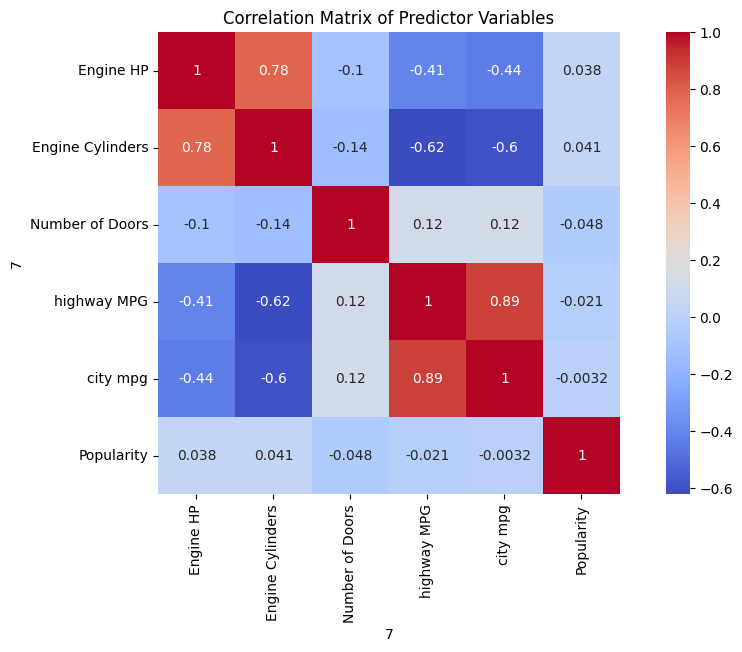

In [46]:
numeric_data = car_data.select_dtypes(include=['float64', 'int64'])
numeric_data_predictors = numeric_data.drop('MSRP', axis=1)
correlation_matrix1 = numeric_data_predictors.corr()
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()

***Strong Positive Correlation:***

Engine HP and Engine Cylinders have a strong positive correlation of 0.78. This suggests that vehicles with more cylinders generally have higher horsepower, which is intuitive as more cylinders often equate to greater power output.

***High Correlation Between Fuel Efficiency Metrics:***

City MPG and Highway MPG show a high positive correlation of 0.89. This indicates that vehicles efficient in city driving tend to also be efficient on the highway, which is expected as fuel efficiency characteristics often translate across driving conditions.

***Moderate Negative Correlations with Engine Metrics:***

Engine Cylinders has moderate negative correlations with both Highway MPG (-0.62) and City MPG (-0.6), suggesting that vehicles with more cylinders tend to be less fuel-efficient.
Similarly, Engine HP shows a negative correlation with Highway MPG (-0.41) and City MPG (-0.44), indicating that higher-powered engines are typically less fuel-efficient.

***Weak or Negligible Correlations:***

Popularity has weak correlations with all other variables, with the highest being 0.041 with Engine Cylinders. This implies that the popularity of a vehicle is not strongly associated with its horsepower, engine size, fuel efficiency, or other listed characteristics.
Number of Doors also shows weak correlations with other variables, indicating it does not strongly relate to engine power, fuel efficiency, or popularity

So, wherever the correlaion is high, when we go about regression or any other predcitive techniques, we remove one of the two highly correlated columns when doing the analysis